In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("cleaned_data.csv")
data.head()

,Unnamed: 0,REF_DATE,GEO,Traveller characteristics,Traveller type,VALUE,Year,Month,Province,Security_Level,Resident Type,Mode of Transport,Resident Category
0,1068630,2021-04-01,Midway,Canadian residents returning from the United S...,Tourists (overnight),0.0,2021,4,British Columbia,High-Security,Canadian residents returning from the United S...,"water, ferry",Canadian Residents
1,2112956,2022-08-01,Ontario,Canadian residents returning from countries ot...,Tourists (overnight),0.0,2022,8,Ontario,High-Security,Canadian residents returning from countries ot...,"air, private aircraft, direct",Canadian Residents
2,1240955,2021-07-01,Hamilton,Residents of countries other than the United S...,Tourists (overnight),0.0,2021,7,Ontario,High-Security,Residents of countries other than the United S...,"land, vehicle type not available",Residents of Other Countries
3,157501,2020-03-01,St-Bernard-de-Lacolle: Highway 15,Residents of countries other than the United S...,Travellers,299.0,2020,3,Quebec,High-Security,Residents of countries other than the United S...,"land, vehicle type not available",Residents of Other Countries
4,1987878,2022-06-01,Brockville,Canadian residents returning from countries ot...,Excursionists (same-day),0.0,2022,6,Ontario,High-Security,Canadian residents returning from countries ot...,"water, private boat, direct",Canadian Residents


In [3]:
data.drop(['Unnamed: 0', 'Security_Level'], axis=1, inplace=True)

In [4]:
rows_per_year = data.groupby('Year').size()

In [5]:
print(rows_per_year)

Year
2020    38139
2021    38219
2022    40592
2023    17522
2024     8672
dtype: int64


In [6]:
test = data.copy()

In [10]:
# Clean the GEO column to remove leading/trailing spaces and convert to lowercase
test['GEO'] = test['GEO'].str.strip().str.lower()

In [11]:
import re

# Define security level mappings for specific locations
high_security_locations = {
    'Yukon', 'Niagara Falls - Rainbow Bridge', 'Toronto Pearson International Airport', 
    'Vancouver International Airport', 'Ottawa', 'Calgary', 'Toronto', 
    'Montreal', 'Quebec City', 'Yellowknife', 'Halifax/Dartmouth Area', 
    'Winnipeg', 'Victoria', 'St. John\'s', 'Vancouver Coast and Mountains', 
    'Labrador', 'Prince Rupert', 'Hamilton'
}

moderate_security_locations = {
    'Sudbury', 'Niagara Falls', 'Windsor', 'Kingston', 'Saskatoon', 'Moncton', 
    'Saint John', 'Gatineau', 'Oshawa', 'Kelowna', 'Thunder Bay', 'Kitchener/Waterloo/Cambridge'
}

low_security_locations = {
    'Fosterville', 'Piney', 'Rainy River', 'Herdman', 'Trenton', 'Chopaka', 
    'Lena', 'Bracebridge', 'Campobello', 'Fundy Coastal', 'Dalhousie', 'Southeastern Saskatchewan', 
    'Kenora', 'Pelee Island', 'Gillespie', 'Acadian Coastal', 'Point Alexandria (Wolfe Island)', 
    'Sand Point Lake', 'Cartwright', 'Rykerts', 'Aldergrove', 'Algonquin Park, Almaguin Highlands, Muskoka, and Parry Sound',
    'Western Newfoundland', 'Boissevain', 'Tims', 'Moncton', 'Barrett'
}

# Define the function to classify the security level based on location in the text
def extract_and_classify_security(text):
    # Find all locations in the text (using keywords or substrings)
    locations_found = []
    
    for location in high_security_locations.union(moderate_security_locations, low_security_locations):
        if re.search(r'\b' + re.escape(location) + r'\b', text, re.IGNORECASE):  # Case insensitive search
            locations_found.append(location)
    
    # Classify based on the found location
    if any(loc in high_security_locations for loc in locations_found):
        return "High Security"
    elif any(loc in moderate_security_locations for loc in locations_found):
        return "Moderate Security"
    elif any(loc in low_security_locations for loc in locations_found):
        return "Low Security"
    return "Unknown"  # If no match found

# Apply the function to classify the security level based on geo text
test['Security_Level'] = test['GEO'].apply(extract_and_classify_security)

# Display the dataframe with classified security levels
print(test[['GEO', 'Security_Level']])


                                      GEO     Security_Level
0                                  midway            Unknown
1                                 ontario            Unknown
2                                hamilton      High Security
3       st-bernard-de-lacolle: highway 15            Unknown
4                              brockville            Unknown
...                                   ...                ...
143139   niagara falls - whirlpool bridge  Moderate Security
143140                            sudbury  Moderate Security
143141         barrie/collingwood/orillia            Unknown
143142                          st. croix            Unknown
143143                          gananoque            Unknown

[143144 rows x 2 columns]


In [12]:
test['Security_Level'].value_counts()

Security_Level
Unknown              112184
High Security         13755
Low Security          11185
Moderate Security      6020
Name: count, dtype: int64

In [13]:
x = test[test['Security_Level']=='Unknown']
x['GEO'].unique()

array(['midway', 'ontario', 'st-bernard-de-lacolle: highway 15',
       'brockville', 'dawson', 'pacific highway', 'sept-iles',
       'stanstead: route 55', 'charlottetown',
       'southwestern saskatchewan',
       'huron, perth, waterloo, and wellington', 'roosville', 'iqaluit',
       'cyclone island', 'west central saskatchewan', 'nunavut',
       'st. andrews', 'gaspe/rimouski', 'stanstead (beebe): route 247',
       'stephenville', 'niagara area', 'kitimat', 'carway', 'st-pamphile',
       'emerson', 'pleasant camp', 'st-armand/philipsburg',
       'new brunswick', 'courtenay/comox', 'crystal city', 'glen sutton',
       'prince edward island', 'northeastern ontario', 'clarenceville',
       'northwestern ontario', 'lacolle: route 223', 'yarmouth', 'canada',
       'grand falls/grand-sault', 'churchill', 'osoyoos', 'morses line',
       'eastern townships', 'stratford', 'monchy', 'waneta', 'nanaimo',
       'ste-aurelie', 'port colborne', 'cornwall', 'bedwell harbour',
       '

In [14]:
# Predefined list of locations for each security level
security_mapping = {
    'High Security': [
        'st-bernard-de-lacolle: highway 15', 'campobello', 'dalhousie', 'rainy river', 
        'huron, perth, waterloo, and wellington', 'chopaka', 'bracebridge', 'nunavut', 
        'st. andrews', 'stephenville', 'niagara area', 'kitimat', 'carway', 'kenora', 
        'st-pamphile', 'emerson', 'st-armand/philipsburg', 'crystal city', 'glen sutton', 
        'clarenceville', 'lacolle: route 223', 'yarmouth', 'canada', 'grand falls/grand-sault', 
        'churchill', 'osoyoos', 'prince rupert', 'morses line', 'eastern townships', 'stratford', 
        'monchy', 'waneta', 'windsor', 'cornwall', 'st. leonard', 'coronach', 'digby', 
        'walpole island', 'belleville', 'sydney', 'south junction', 'grand manan', 'gananoque', 
        'niagara falls - rainbow bridge', 'west poplar river', 'thompson okanagan', 'oshawa', 
        'woodstock', 'st. croix', 'niagara falls - queenston bridge', 'evangeline trail/lighthouse route',
        'drummondville', 'kootenay rockies', 'lansdowne', 'manitoulin island', 'fort frances', 
        'pelee island', 'kingston', 'northwest territories', 'estevan', 'beaver creek', 'covey hill', 
        'gillespie', 'new glasgow', 'bruce peninsula, southern georgian bay, and lake simcoe',
        'point alexandria (wolfe island)', 'chatham', 'fortune', 'oungre', 'boundary bay', 
        'old crow', 'campbell river', 'simcoe/nanticoke', 'bloomfield', 'river de chute', 'brantford', 
        'yellowknife', 'corner brook', 'noyan', 'midland', 'sault ste. marie', 'st. thomas', 'north bay', 
        'east pinnacle', 'mont tremblant', 'andover', 'climax', 'sarnia', 'four falls', 'paterson',
        "st. john's", 'mirabel', 'coulter', 'st-just-de-bretenieres', 'sherbrooke', 'quai richelieu', 
        'prescott', 'gretna', 'laurentides', 'chartierville', 'river valley', 'goodlands', 
        'shelburne/liverpool/lunenberg', 'kingsgate', 'pembina valley', 'baie-comeau', 'carievale', 
        'brandon', 'sunrise trail', 'regway', 'sand point lake', 'st. stephen - ferry and other locations', 
        'saguenay - lac-saint-jean', 'cartwright', 'rykerts', 'aldergrove', 'coutts', 
        'algonquin park, almaguin highlands, muskoka, and parry sound', 'hemmingford', 'port hawkesbury', 
        'goderich', 'lewisporte/botwood', 'st-hubert', 'abercorn', 'douglas', 'prince george', 'cote-nord',
        'trout river', 'fraser', 'snowflake', 'willow creek', 'sorel', 'owen sound', 'peterborough', 
        'st. anthony', 'penticton', 'granby', 'clair', 'del bonita', 'woburn/lac-megantic', 'northgate',
        'niagara falls - whirlpool bridge', 'frelighsburg', 'sidney', 'st-zacharie', 'highwater', 
        'little gold creek', 'winkler', 'barrie/collingwood/orillia', 'dundee', 'stanstead: route 143', 
        'nelway', 'pohenegamook', 'pond inlet', 'windygates', 'clarenville', 'tolstoi', 'saguenay', 
        'boissevain', 'east hereford', 'cranbrook', 'torquay', 'cape breton', 'edmundston', 'fort erie', 
        'lacolle: route 221', 'stewart', 'armstrong', 'abitibi-temiscamingue', 'lyleton', 'milltown', 
        'wild horse', 'niagara/st. catharines - other locations', 'centreville', 'hereford road', 
        'avalon peninsula', 'north portal', 'stanhope', 'nunavut area', 'trois-rivieres', 'monteregie', 
        'pigeon river', 'sprague', 'argentia', 'whitehorse', 'bathurst', 'goose bay', 'cap-aux-meules', 
        'aden', 'cascade', 'northwest territories area', 'gaspe peninsula/iles-de-la-madeleine', 'gander', 
        'quetico-superior country', "val d'or/rouyn-noranda", 'fort mcmurray', 'valleyfield', 'powell river', 
        'big beaver', 'franklin', 'jamieson line', 'sombra', 'timmins'
    ],
    'Moderate Security': [
        'laurentides', 'chartierville', 'river valley', 'goodlands', 'shelburne/liverpool/lunenberg',
        'kingsgate', 'pembina valley', 'baie-comeau', 'carievale', 'brandon', 'sunrise trail', 'regway',
        'sand point lake', 'st. stephen - ferry and other locations', 'saguenay - lac-saint-jean',
        'cartwright', 'rykerts', 'aldergrove', 'coutts'
    ],
    'Low Security': [
        'bruce peninsula, southern georgian bay, and lake simcoe', 'point alexandria (wolfe island)',
        'chatham', 'fortune', 'oungre', 'boundary bay', 'old crow', 'campbell river', 'simcoe/nanticoke',
        'bloomfield', 'river de chute', 'brantford', 'yellowknife', 'corner brook', 'noyan', 'midland',
        'sault ste. marie', 'st. thomas', 'north bay', 'east pinnacle', 'mont tremblant', 'andover',
        'climax', 'sarnia', 'four falls', 'paterson', 'st. john\'s', 'mirabel', 'coulter', 'st-just-de-bretenieres',
        'sherbrooke', 'quai richelieu', 'prescott', 'gretna', 'laurentides', 'chartierville', 'river valley',
        'goodlands', 'shelburne/liverpool/lunenberg', 'kingsgate', 'pembina valley', 'baie-comeau',
        'carievale', 'brandon', 'sunrise trail', 'regway', 'sand point lake', 'st. stephen - ferry and other locations'
    ]
}


In [15]:
def classify_security_level_from_geo(geo):
    geo = geo.lower().strip()  # Clean the GEO value for consistent matching
    
    # Check the security level based on predefined lists
    for level, locations in security_mapping.items():
        if geo in locations:
            return level  # Return the level if a match is found

    return 'Unknown'  

In [16]:
test.loc[test['Security_Level'] == 'Unknown', 'Security_Level'] = test.loc[test['Security_Level'] == 'Unknown', 'GEO'].apply(classify_security_level_from_geo)


In [17]:
test['Security_Level'].value_counts()

Security_Level
High Security        95505
Unknown              30434
Low Security         11185
Moderate Security     6020
Name: count, dtype: int64

In [18]:
security_mapping_2 = {
    'High Security': [
        'midway', 'brockville', 'dawson', 'pacific highway',
        'stanstead: route 55', 'pleasant camp', 'ste-aurelie',
        'bedwell harbour', 'st. stephen - 3rd bridge', 'carson',
        'abbotsford/huntingdon', 'chief mountain', 'roosville'
    ],
    'Moderate Security': [
        'ontario', 'sept-iles', 'charlottetown', 'courtenay/comox',
        'new brunswick', 'quebec', 'halifax/dartmouth', 'edmonton',
        'saskatchewan', 'manitoba', 'regina', 'western manitoba',
        'northern british columbia', 'northern manitoba',
        'gaspe/rimouski', 'quebec/chaudiere-appalaches',
        'mauricie/centre-du-quebec', 'forest city', 'kamloops',
        'eastern manitoba', 'southwestern saskatchewan',
        'west central saskatchewan'
    ],
    'Low Security': [
        'prince edward island', 'northeastern ontario', 'northwestern ontario',
        'central and northern alberta', 'southern alberta', 'nova scotia',
        'eastern newfoundland', 'southwestern ontario', 'london',
        'newmarket', 'prince edward island area', 'vancouver island',
        'lethbridge', 'central newfoundland', 'fredericton', 'alberta',
        'british columbia', 'nanaimo', 'vancouver', 'iqaluit',
        'cyclone island', 'inuvik/tuktoyaktuk', 'port colborne'
    ]
}


In [19]:
def classify_security_level_from_geo(geo):
    geo = geo.lower().strip()  # Standardize formatting
    
    for level, locations in security_mapping_2.items():
        if geo in locations:
            return level  # Return the correct classification
    
    return 'Unknown'

In [20]:
test.loc[test['Security_Level'] == 'Unknown', 'Security_Level'] = test.loc[test['Security_Level'] == 'Unknown', 'GEO'].apply(classify_security_level_from_geo)


In [21]:
test['Security_Level'].value_counts()

Security_Level
High Security        102083
Low Security          22498
Moderate Security     17529
Unknown                1034
Name: count, dtype: int64

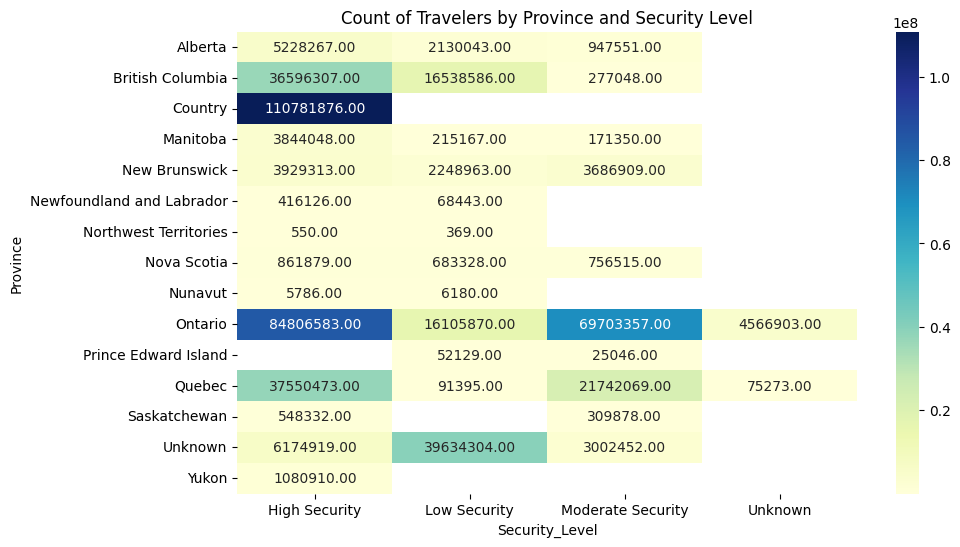

In [26]:
# Count total travelers by security type for each province
total_travelers = test.groupby(['Province', 'Security_Level'])['VALUE'].sum().reset_index()

# Create a pivot table with the count of travelers by province and security level
pivot_table = total_travelers.pivot_table(index='Province', columns='Security_Level', values='VALUE', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.2f')  # Format values to 2 decimal places
plt.title('Count of Travelers by Province and Security Level')
plt.ylabel('Province')
plt.show()


#### The heatmap visually interpretation: 

- Quebec (23,921) and Ontario (20,737) lead in high-security enforcement, suggesting stricter regulations or higher risk factors. 
- British Columbia (13,995) follows, with a significant high-security presence but also notable low-security cases (3,848). 
- Provinces like Alberta, Manitoba, and New Brunswick show a more balanced distribution, meaning they implement all three security levels without a strong bias. 
- Quebec stands out for its extremely low count of low-security cases (486), hinting at a tendency toward stricter enforcement. 
- Some provinces, like Nunavut, Northwest Territories, and Prince Edward Island, show lower overall counts, likely due to smaller populations or fewer enforcement measures. 

## 4. How did travel volumes shift across provinces during key phases of the pandemic?

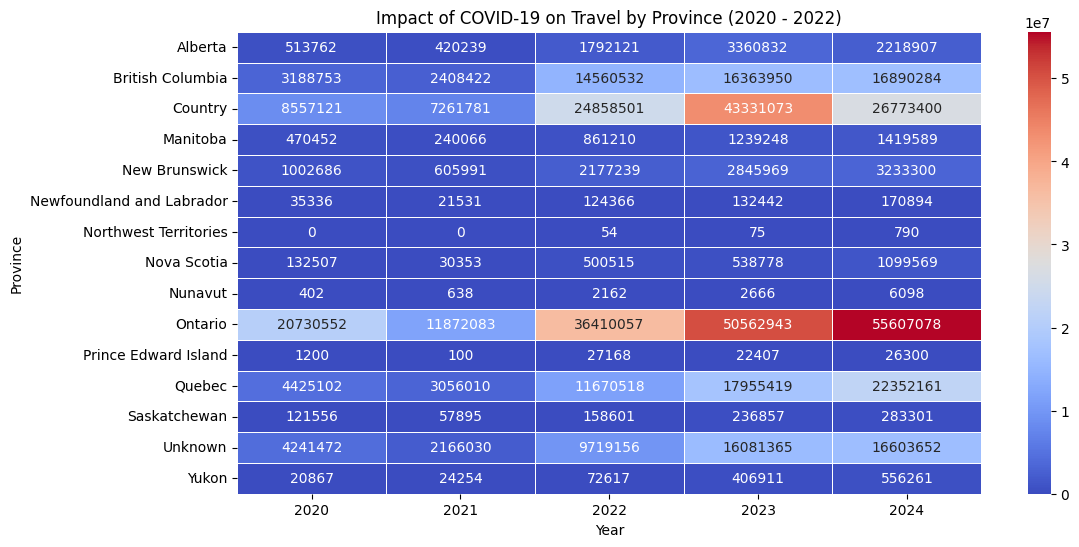

In [27]:
# Group data by Province and Year
regional_travel = test.groupby(['Province', 'Year'])['VALUE'].sum().reset_index()

# Pivot the data for heatmap format
heatmap_data = regional_travel.pivot(index='Province', columns='Year', values='VALUE')

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

# Titles and labels
plt.title("Impact of COVID-19 on Travel by Province (2020 - 2022)")
plt.xlabel("Year")
plt.ylabel("Province")

plt.show()

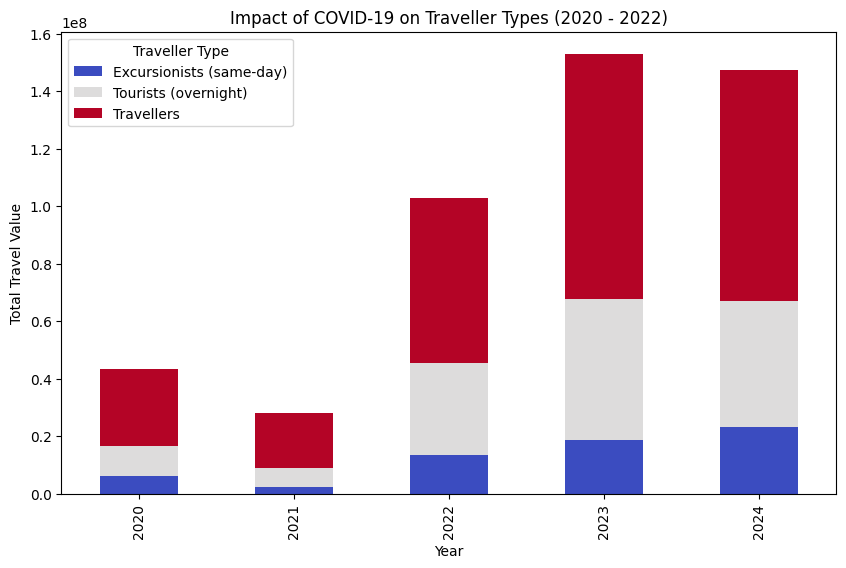

In [28]:
# Group by Traveller Type and Year
traveller_type_travel = test.groupby(['Traveller type', 'Year'])['VALUE'].sum().reset_index()

# Pivot the data
pivot_df = traveller_type_travel.pivot(index='Year', columns='Traveller type', values='VALUE')

# Plot a stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')

# Titles and labels
plt.title("Impact of COVID-19 on Traveller Types (2020 - 2022)")
plt.xlabel("Year")
plt.ylabel("Total Travel Value")

plt.legend(title="Traveller Type")
plt.show()

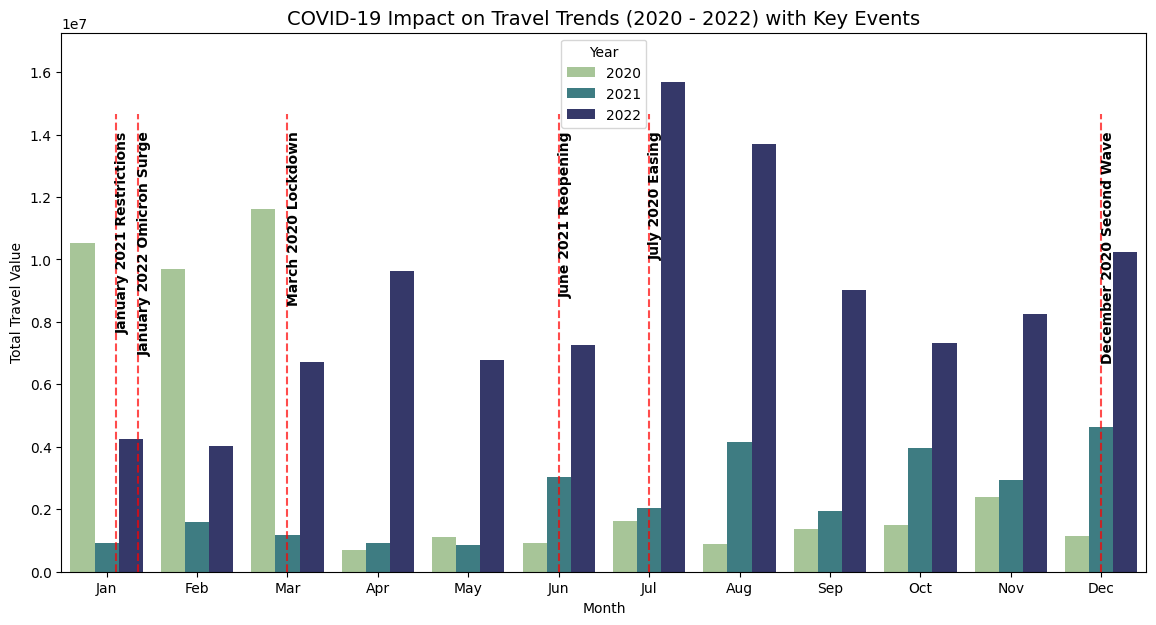

In [29]:
# Define major lockdown events (adjust based on actual data)
lockdown_dates = {
    'March 2020 Lockdown': ('2020', 3),
    'July 2020 Easing': ('2020', 7),
    'December 2020 Second Wave': ('2020', 12),
    'January 2021 Restrictions': ('2021', 1.1),  # Slightly shifted
    'June 2021 Reopening': ('2021', 6),
    'January 2022 Omicron Surge': ('2022', 1.35)  # Slightly shifted
}

# Filter dataset to include only 2020-2022
df_filtered = test[test['Year'].between(2020, 2022)]

# Aggregate monthly travel data
monthly_travel = df_filtered.groupby(['Year', 'Month'])['VALUE'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(14, 7))
sns.barplot(data=monthly_travel, x='Month', y='VALUE', hue='Year', palette='crest')

# Set a fixed upper limit to avoid overlap
plt.ylim(0, monthly_travel['VALUE'].max() * 1.1)  

# Add lockdown markers with red lines and dark text
for event, (year, month) in lockdown_dates.items():
    if year in ['2020', '2021', '2022']:  # Ensure only events from 2020-2022 are shown
        y_position = monthly_travel['VALUE'].max() * 0.9  # Lowered text placement
        plt.axvline(x=month - 1, color='red', linestyle='--', alpha=0.7, ymax=0.85)  # Red line
        plt.text(month - 1, y_position, event, rotation=90, color='black', fontsize=10, va='top', fontweight='bold')  # Darker text

# Titles and labels
plt.title("COVID-19 Impact on Travel Trends (2020 - 2022) with Key Events", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Travel Value")
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend(title="Year")
plt.show()